**Install scikit-learn** bagi yang belum instalasi

In [ ]:
!pip install scikit-learn==0.23.1

Memanggil semua package yang akan digunakan

In [2]:
import sys
import numpy as np
import pandas as pd
import sklearn.tree as tree

Load data set, dengan cara upload terlebih dahulu ke drive google collab

In [3]:
df = pd.read_csv('drug200.csv')
df.head()

,umur,jk,imt,kolestrol,kandungan,minuman
0,23,F,HIGH,HIGH,25.355,5
1,47,M,LOW,HIGH,13.093,3
2,47,M,LOW,HIGH,10.114,3
3,28,F,NORMAL,HIGH,7.798,4
4,61,F,LOW,HIGH,18.043,5


**Lakukan visualisasi data terlebih dahulu untuk mengeksplorasi data**

In [4]:
df['minuman'].value_counts()

,count
minuman,
5,91
4,54
1,23
3,16
2,16


Membuat histogram beberapa variabel bebas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   umur       200 non-null    int64  
 1   jk         200 non-null    object 
 2   imt        200 non-null    object 
 3   kolestrol  200 non-null    object 
 4   kandungan  200 non-null    float64
 5   minuman    200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [6]:
import matplotlib.pyplot as plt

Bar Chart Jenis Kelamin

In [7]:
# Tabulasi data
tabulasi_jk = df['jk'].value_counts().reset_index()
tabulasi_jk.columns = ['Kategori', 'Jumlah']  # Menamai kolom
print(tabulasi_jk)

  Kategori  Jumlah
0        M     104
1        F      96


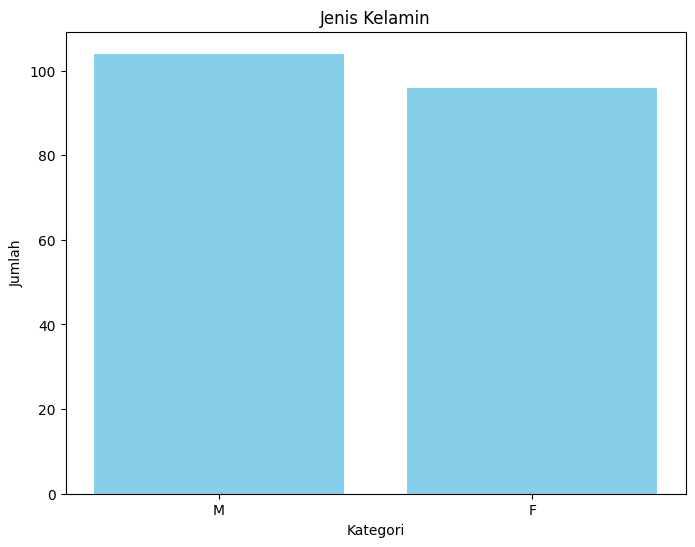

In [8]:
# Membuat bar chart
plt.figure(figsize=(8, 6))  # Mengatur ukuran gambar
plt.bar(tabulasi_jk['Kategori'], tabulasi_jk['Jumlah'], color='skyblue')  # Membuat bar chart
plt.xlabel('Kategori')  # Label sumbu X
plt.ylabel('Jumlah')  # Label sumbu Y
plt.title('Jenis Kelamin')  # Judul
plt.show()  # Menampilkan grafik

Bar Chart Drug

In [9]:
# Tabulasi data
tabulasi_minuman = df['minuman'].value_counts().reset_index()
tabulasi_minuman.columns = ['Kategori', 'Jumlah']  # Menamai kolom
print(tabulasi_minuman)

   Kategori  Jumlah
0         5      91
1         4      54
2         1      23
3         3      16
4         2      16


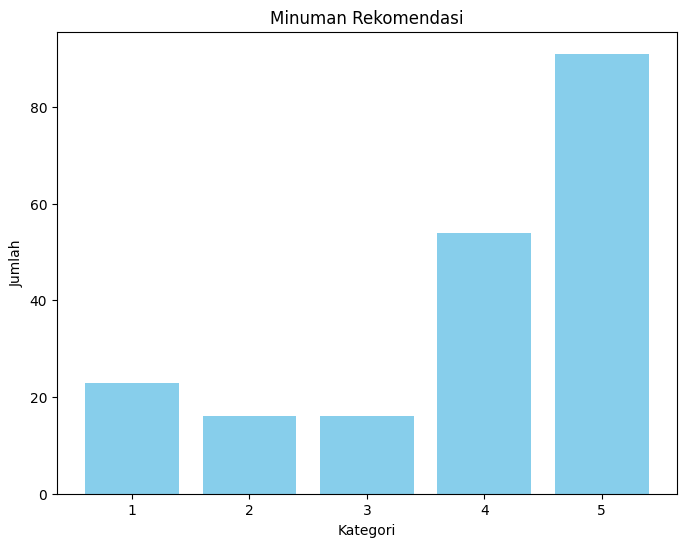

In [11]:
# Membuat bar chart
plt.figure(figsize=(8, 6))  # Mengatur ukuran gambar
plt.bar(tabulasi_minuman['Kategori'], tabulasi_minuman['Jumlah'], color='skyblue')  # Membuat bar chart
plt.xlabel('Kategori')  # Label sumbu X
plt.ylabel('Jumlah')  # Label sumbu Y
plt.title('Minuman Rekomendasi')  # Judul
plt.show()  # Menampilkan grafik

**Persiapan Data**

*   Membuat kelompok Feature atau variabel bebas tersendiri
*   Membuat kelompok labels atau variabel terikat tersendiri



In [12]:
df.columns

Index(['umur', 'jk', 'imt', 'kolestrol', 'kandungan', 'minuman'], dtype='object')

In [13]:
X = df[['umur', 'jk', 'imt', 'kolestrol', 'kandungan', 'minuman']] .values  #.astype(float)
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355, 5],
       [47, 'M', 'LOW', 'HIGH', 13.093, 3],
       [47, 'M', 'LOW', 'HIGH', 10.114, 3],
       [28, 'F', 'NORMAL', 'HIGH', 7.798, 4],
       [61, 'F', 'LOW', 'HIGH', 18.043, 5]], dtype=object)

In [14]:
y = df['minuman'].values
y[0:5]

array([5, 3, 3, 4, 5])

Data berbentuk huruf tidak dapat di proses sehingga perlu di transformasi berbentuk numerik

In [15]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

X[0:5]


array([[23, 0, 0, 0, 25.355, 5],
       [47, 1, 1, 0, 13.093, 3],
       [47, 1, 1, 0, 10.114, 3],
       [28, 0, 2, 0, 7.798, 4],
       [61, 0, 1, 0, 18.043, 5]], dtype=object)

**Membagi data menjadi data training dan testing**

proporsi sebesar 30% data testing, dan 70% data training

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_tes, y_train, y_tes = train_test_split(X, y, test_size=0.3, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_tes.shape,  y_tes.shape)

Train set: (140, 6) (140,)
Test set: (60, 6) (60,)


In [17]:
y_tes

array([5, 4, 4, 4, 4, 3, 5, 1, 2, 1, 5, 1, 5, 5, 4, 5, 4, 4, 2, 4, 4, 5,
       5, 5, 4, 2, 5, 5, 1, 4, 2, 3, 3, 4, 4, 3, 5, 4, 4, 4, 1, 5, 3, 5,
       1, 5, 5, 5, 5, 4, 2, 4, 5, 4, 5, 5, 1, 4, 5, 4])

**Klasifikasi Decision Tree**

In [18]:
from sklearn.tree import DecisionTreeClassifier

**1. Training atau melatih model**

We will first create an instance of the DecisionTreeClassifier called drugTree.
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [21]:
model_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**2. Prediksi data testing**

In [25]:
predTree = model_dt.predict(X_tes)
predTree[0:5]

array([5, 4, 4, 4, 4])

In [27]:
print (predTree[0:5])
print (y_tes[0:5])

[5 4 4 4 4]
[5 4 4 4 4]


**3. Evaluasi Akurasi Model**

In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [28]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_tes, predTree))

DecisionTrees's Accuracy:  0.9833333333333333
